In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [1]:
class SoftMaxRegressor:
    def __init__(self):
        pass

    def train(self, X, y, n_classes, epoch=10, lr=0.1):
        self.n_samples, self.n_features = X.shape
        self.n_classes = n_classes

        self.weights = np.random.rand(self.n_classes, self.n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []

        for i in range(epoch):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - lr * dw.T
            self.bias = self.bias - lr * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses
    
    def predict(self, X):
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]
    
    def softmax(self, scores):
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        return softmax
    
    def compute_scores(self, X):
        return np.dot(X, self.weights.T) + self.bias
    
    def cross_entropy(self, y_true, probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss
    
    def one_hot(self, y):
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

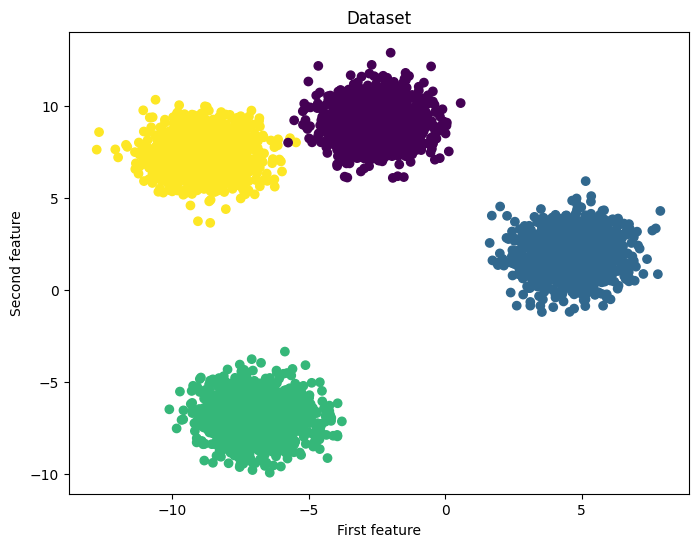

In [4]:
X, y_true = make_blobs(centers=4, n_samples = 5000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [5]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


Iteration number: 0, loss: 4.0174
Iteration number: 100, loss: 0.0366
Iteration number: 200, loss: 0.0218
Iteration number: 300, loss: 0.0162
Iteration number: 400, loss: 0.0132
Iteration number: 500, loss: 0.0112
Iteration number: 600, loss: 0.0099
Iteration number: 700, loss: 0.0089


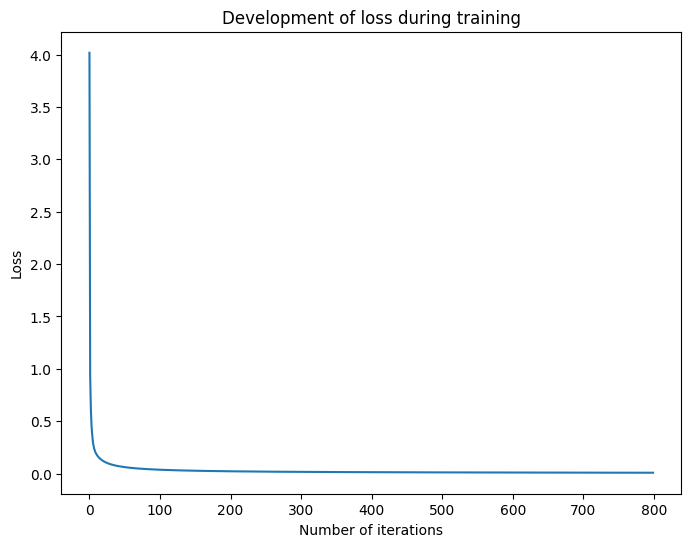

In [7]:
regressor = SoftMaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train, y_train, lr=0.1, epoch=800, n_classes=4)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [8]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 100.0%
